Изучим общую информацию из имеющихся данных

<div class="alert alert-info"> <b>Основная цель данного рабочего проекта:</b> Выснить какой из двух представленных тарифов более окупаемый и приносящий больше денег. Данная информация поможет оператору сотовой связи скореектировать рекламный бюджет</div>

In [1]:
#Подключим необходимые библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
from math import ceil as math

In [2]:
#Прочтем файлы с данными 
calls = pd.read_csv('/datasets/calls.csv') # информация о звонках
internet = pd.read_csv('/datasets/internet.csv') # информация об интернет-сессиях
messages = pd.read_csv('/datasets/messages.csv') # информация о сообщениях
tariffs = pd.read_csv('/datasets/tariffs.csv') # информация о тарифах
users = pd.read_csv('/datasets/users.csv') # информация о пользователях

In [3]:
#Получим информацию с таблицы "Calls" методом info
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
#Выведем первые 5 строк таблицы calls
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
#Посмотрим на столбцы в таблице
calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [6]:
#проверим наличие пустых значений
calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [7]:
#Проверим наличие дубликатов
calls.duplicated().sum()

0

<div class="alert alert-info"> <b>Комментарий студента: 
</b> 
    Вывод:
    
1)Необходимо изменить типы данных в столбцах call_date : id, call_date, user_id
    
2)Пустых значений и дубликатов не имеется  </div>

Изучим Dataset Internet

In [8]:
#Получим информацию с таблицы "Internet" методом info
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
#Выведем первые 5 строк таблицы internet
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
#Посмотрим на столбцы в таблице "Internet"
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [11]:
#Посчитаем количество пустых значений в таблице "Internet"
internet.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [12]:
#Посчитает количество дубликатов в таблице "Internet"
internet.duplicated().sum()

0

<div class="alert alert-info"> <b>Комментарий студента:</b> Вывод:

1)Необходимо удалить столбец unnamed, так как он дублирует индексацию таблицы
2)Также нужно изменить типы данных в столбцах : id , session_date

3)Пустых значений и дубликатов не имеется</div>

Изучим Dataset Messages

In [13]:
#Получим информацию с таблицы "Messages" методом info
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
#Выведем первые пять строк из таблицы "Messages"
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
#Посмотрим на столбцы из таблицы "Messages"
messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

In [16]:
#Посчитаем количество пустых значений в таблице "Messages"
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [17]:
#Посчитаем количество дубликатов в таблице "Messages"
messages.duplicated().sum()

0

<div class="alert alert-info"> <b>Комментарий студента:</b> 
   Вывод:

1)Изменить типы данных в столбце : id, message_date
    
2)Пустых значений и дубликатов не имеется</div>

Изучим Dataset Tariffs

In [18]:
#Получим информацию с таблицы "Tariffs" методом info
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [19]:
#Выведем первые пять строк таблицы "Tariffs"
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [20]:
#Посмотрим на столбцы из таблицы "Tariffs"
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [21]:
#Посчитаем количество пустых значений в таблице "Tariffs"
tariffs.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [22]:
#Посчитаем количество дубликатов в таблице "Tariffs"
tariffs.duplicated().sum()

0

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Вывод:

1)Типы данных указаны верно. Изменять ничего не нужно

2)Пустых значений и дубликатов не имеется</div>

Изучим Dataset Users

In [23]:
#Получим информацию с таблицы "Users" методом info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [24]:
#Выведем первые пять строк таблицы "Users"
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [25]:
#Посмотрим на столбцы таблицы "Users"
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [26]:
#Посмотрим на имеющиеся данные о возрасте. 
users['age'].value_counts()

53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64

In [27]:
#Посмотрим сколько пользователей какого тарифа мы имеем
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [28]:
#Посмотрим на столбец first_name
users['first_name'].value_counts()

Радим        6
Пётр         5
Леонид       5
Веселина     4
Артём        4
            ..
Виолетта     1
Виталий      1
Саида        1
Станислав    1
Степан       1
Name: first_name, Length: 246, dtype: int64

In [29]:
#Посмотрим на столбец last_name
users['last_name'].value_counts()

Андреенко    5
Озерова      3
Булгаков     3
Аничкина     3
Абашкина     3
            ..
Абалакова    1
Семёнов      1
Пономарёв    1
Панфилов     1
Алютин       1
Name: last_name, Length: 419, dtype: int64

In [30]:
#Посмотрим на столбец city
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Нижневартовск       1
Подольск            1
Архангельск         1
Химки               1
Иваново             1
Name: city, Length: 76, dtype: int64

In [31]:
#Посчитаем количество пустых значений в таблице "users"
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [32]:
#Посчитаем количество дубликатов таблицы "Users"
users.duplicated().sum()

0

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Вывод:

1)Изменить типы данных в : churn_date, reg_date
    
2)Привести к нижнему регистру названия городов, Имена и фамилии
    
3)Имеются пустые значения в столбце churn_date, необходимо будет поработать с данным столбцом и решить, что будет делать с данным столбцом: игнорировать или проводить замены пустых значений на другие.
    
4)Дубликатов нет.</div>

<div class="alert alert-info"> <b>Вывод по изучению общей информации</b> 
    
    1)Практически во всех таблицах имеются проблемы с типами данных, которые нужно будет так же изменить.

    2)В Таблице Internet, имеется столбец - Unnamed, который можно будет удалить, так как он просто дублирует индексацию таблицы.</div>

<div class="alert alert-info"> <b>Предобработка данных</b> 

1)Приведем данные к нужным типам;

2)Попробуем найти и исправить ошибки в данных;

3)Посчитаем для каждого пользователя:
    
    a)количество сделанных звонков и израсходованных минут разговора по месяцам;
    b)количество отправленных сообщений по месяцам;
    c)объем израсходованного интернет-трафика по месяцам;
    d)помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).
</div>

Изменим типы данных

In [33]:
#Изменим типы данных в таблице Calls
calls['id'] = calls['id'].astype('int64')
calls['call_date'] = pd.to_datetime(calls['call_date'])
#calls['duration'] = calls['duration'].astype('int64')

In [34]:
#Проверим типы данных
calls.dtypes

id                    int64
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [35]:
#Изменим типы данных в таблице Internet
internet['id'] = internet['id'].astype(int)
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [36]:
#Удалим столбец unnamed в таблице Internet
internet.drop('Unnamed: 0', axis='columns', inplace=True)
internet.dtypes

id                       int64
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [37]:
#Посмотрим нашу таблицу.
internet.head()

,id,mb_used,session_date,user_id
0,10000,112.95,2018-11-25,1000
1,10001,1052.81,2018-09-07,1000
2,10002,1197.26,2018-06-25,1000
3,10003,550.27,2018-08-22,1000
4,10004,302.56,2018-09-24,1000


In [38]:
#Изменим типы данных в таблице Messages
messages['id'] = messages['id'].astype(int)
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [39]:
#Проверим изменили ли мы типы данных
messages.dtypes

id                       int64
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [40]:
#Выведем первые пять строк таблицы Messages
messages.head()

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000


In [41]:
#Изменим типы данных и приведем к нижнему регистру нижеследующие столбцы
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['city'] = users['city'].str.lower()
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()

In [42]:
#Выведем случайные 10 строк таблицы Users
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
82,1082,48,NaT,москва,авксентий,малышев,2018-10-05,smart
74,1074,68,NaT,якутск,андрей,кравцов,2018-12-30,smart
54,1054,33,NaT,омск,кристина,платонова,2018-03-20,smart
130,1130,58,NaT,тюмень,инара,крюкова,2018-04-01,smart
361,1361,38,NaT,екатеринбург,рената,кошелева,2018-09-09,ultra
117,1117,42,NaT,тюмень,дана,меркулова,2018-12-10,smart
377,1377,59,NaT,брянск,альфред,семин,2018-02-25,ultra
37,1037,73,NaT,череповец,изольда,архипова,2018-10-13,smart
13,1013,36,NaT,иваново,борис,андреенко,2018-11-14,ultra
354,1354,56,NaT,сочи,лола,кулагина,2018-08-19,smart


In [43]:
# Округлим минуты и мегабайты у всех тарифов :)
calls['duration'] = calls['duration'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [44]:
# Округлим минуты и мегабайты у всех тарифов :)
calls['duration'] = calls['duration'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'] / 1024

<div class="alert alert-info"> <b>Комментарий студента:</b> Перевел мегабайты в гигабайты простым способом -мегабайты поделил на 1024, без округления .</div>

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [45]:
# Добавим столбец month в таблицу calls, для того, чтобы можно было вывести количество звонков
# и израсходаванных минут по месяцам. 
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls_times = calls.pivot_table(index=['month', 'user_id'], values='duration', aggfunc=['count', 'sum']).rename(columns={'duration': 'total_calls'})
calls_times

count         sum
              total_calls total_calls
month user_id                        
1     1005             15        95.0
      1032             61       380.0
      1045              1         9.0
      1055             64       551.0
      1071             24       194.0
...                   ...         ...
12    1494             62       418.0
      1495            155      1031.0
      1496             80       518.0
      1497             71       545.0
      1499             69       492.0

[3174 rows x 2 columns]

Посчитаем количество отправленных сообщений по месяцам

In [46]:
# Посчитаем количество отправленных сообщений по месяцам для каждого пользователя
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages_times = messages.pivot_table(index=['month','user_id'], values='id', aggfunc='count')
messages_times

id
month user_id    
1     1005      7
      1032     38
      1045      5
      1055     30
      1071     16
...            ..
12    1493     78
      1495     84
      1496     51
      1497     17
      1499     66

[2717 rows x 1 columns]

Посчитаем объем израсходованного интернет-трафика по месяцам

In [47]:
# Посчитаем объем траффика для каждого пользователя по месяцам
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_times = internet.pivot_table(index=['month','user_id'], values='mb_used', aggfunc='sum')
internet_times.head(100)

mb_used
month user_id           
1     1005      2.666016
      1032     23.581055
      1045      2.292969
      1055     16.709961
      1071     15.255859
...                  ...
2     1373     19.720703
      1375     11.477539
      1378     10.564453
      1381     27.110352
      1385     31.889648

[100 rows x 1 columns]

Посчитаем помесячную выручку с каждого пользователя

In [48]:
# Создадим временный DataFrame c таблицей calls
tempdata = pd.DataFrame(calls_times.to_records())
tempdata

,month,user_id,"('count', 'total_calls')","('sum', 'total_calls')"
0,1,1005,15,95.0
1,1,1032,61,380.0
2,1,1045,1,9.0
3,1,1055,64,551.0
4,1,1071,24,194.0
...,...,...,...,...
3169,12,1494,62,418.0
3170,12,1495,155,1031.0
3171,12,1496,80,518.0
3172,12,1497,71,545.0


In [49]:
# Создадим monthly_profit Dataframe для подсчета прибыли компании и перенесем в него столбцы из временного датафрейма, 
#с количеством звонков и общим количество проговоренных минут, так же переименуем столбцы
monthly_profit = pd.DataFrame()
monthly_profit['user_id'] = tempdata['user_id']
monthly_profit['month']   = tempdata['month']
monthly_profit['calls']   = tempdata.iloc[:, 2]
monthly_profit['minutes'] = tempdata.iloc[:, 3]
monthly_profit

,user_id,month,calls,minutes
0,1005,1,15,95.0
1,1032,1,61,380.0
2,1045,1,1,9.0
3,1055,1,64,551.0
4,1071,1,24,194.0
...,...,...,...,...
3169,1494,12,62,418.0
3170,1495,12,155,1031.0
3171,1496,12,80,518.0
3172,1497,12,71,545.0


In [50]:
#Создадим новый временный Dataframe с таблицей messages и переименуем столбец id  в messages
tempdata = pd.DataFrame(messages_times.to_records()).rename(columns={'id': 'messages'})
tempdata

,month,user_id,messages
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16
...,...,...,...
2712,12,1493,78
2713,12,1495,84
2714,12,1496,51
2715,12,1497,17


In [51]:
# Соединим временный dataframe с нашей monthly_profit таблицей
monthly_profit = monthly_profit.merge(tempdata, on=['user_id', 'month'], how='outer')
monthly_profit

,user_id,month,calls,minutes,messages
0,1005,1,15.0,95.0,7.0
1,1032,1,61.0,380.0,38.0
2,1045,1,1.0,9.0,5.0
3,1055,1,64.0,551.0,30.0
4,1071,1,24.0,194.0,16.0
...,...,...,...,...,...
3208,1106,12,NaN,NaN,24.0
3209,1231,12,NaN,NaN,191.0
3210,1328,12,NaN,NaN,7.0
3211,1473,12,NaN,NaN,20.0


In [52]:
#Создадим новый временный Dataframe с таблицей internet и соединим его с нашим monthly_profit таблицей
tempdata = pd.DataFrame(internet_times.to_records())
monthly_profit = monthly_profit.merge(tempdata, on=['user_id', 'month'], how='outer')
monthly_profit

,user_id,month,calls,minutes,messages,mb_used
0,1005,1,15.0,95.0,7.0,2.666016
1,1032,1,61.0,380.0,38.0,23.581055
2,1045,1,1.0,9.0,5.0,2.292969
3,1055,1,64.0,551.0,30.0,16.709961
4,1071,1,24.0,194.0,16.0,15.255859
...,...,...,...,...,...,...
3209,1231,12,NaN,NaN,191.0,31.719727
3210,1328,12,NaN,NaN,7.0,38.536133
3211,1473,12,NaN,NaN,20.0,18.000000
3212,1489,12,NaN,NaN,35.0,16.934570


In [53]:
# Создадим датафрейм tariff_times и перенесем в него столбцы из таблицы users, чтобы соединить их с monthly_profit таблицей
tariff_times = pd.DataFrame()
tariff_times[['user_id','tariff','city','age']] = users[['user_id','tariff','city','age']]
monthly_profit = monthly_profit.merge(tariff_times, on='user_id', how='outer')
monthly_profit

,user_id,month,calls,minutes,messages,mb_used,tariff,city,age
0,1005,1.0,15.0,95.0,7.0,2.666016,smart,набережные челны,67
1,1005,2.0,69.0,456.0,38.0,7.220703,smart,набережные челны,67
2,1005,3.0,77.0,606.0,56.0,10.856445,smart,набережные челны,67
3,1005,4.0,101.0,712.0,41.0,9.145508,smart,набережные челны,67
4,1005,5.0,73.0,595.0,42.0,7.692383,smart,набережные челны,67
...,...,...,...,...,...,...,...,...,...
3211,1328,10.0,NaN,NaN,6.0,21.920898,ultra,мурманск,44
3212,1328,11.0,NaN,NaN,8.0,34.733398,ultra,мурманск,44
3213,1328,12.0,NaN,NaN,7.0,38.536133,ultra,мурманск,44
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,волжский,51


In [54]:
#Проверим на наличие пустых значений
monthly_profit.isnull().sum()

user_id       0
month         2
calls        42
minutes      42
messages    499
mb_used      13
tariff        0
city          0
age           0
dtype: int64

In [55]:
#Заменим пустые значения нулем
monthly_profit = monthly_profit.fillna(0)

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану

In [56]:
#Объявим переменные с ценами и включенными пакетами по нашим тарифам
smart_megabytes_included = 15360
smart_messages_included = 50
smart_minutes_included = 500
smart_monthly_price = 550
smart_price_for_megabyte = 0.1953
smart_price_for_message = 3
smart_price_for_minute = 3

ultra_megabytes_included = 30720
ultra_messages_included = 1000
ultra_minutes_included = 3000
ultra_monthly_price = 1950
ultra_price_for_megabyte = 0.1464
ultra_price_for_message = 1
ultra_price_for_minute = 1

In [65]:
tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [57]:
#Напишем функцию для подсчета прибыли 

def profit_of_megaline(row):
    # Объявим переменные из столбцов нашей таблицы
    mb_used = row['mb_used']
    tariff = row['tariff']
    minutes = row['minutes']
    messages = row['messages']
    total_megabytes = 0
    total_messages = 0 
    total_minutes = 0
    
    # Проведем расчеты, если тариф Смарт, то будут использоваться эти расчеты
    if tariff == 'smart':
        if mb_used > smart_megabytes_included:
            total_megabytes = (mb_used - smart_megabytes_included) * smart_price_for_megabyte
        if minutes > smart_minutes_included:
            total_minutes = (minutes - smart_minutes_included) * smart_price_for_minute
        if messages > smart_messages_included:
            total_messages = (messages - smart_messages_included) * smart_price_for_message
        
        return total_megabytes + total_minutes + total_messages + smart_monthly_price
    
    #Если тариф Ультра, то возьмем эти расчеты
    if tariff == 'ultra':
        if mb_used > ultra_megabytes_included:
            total_megabytes = (mb_used - ultra_megabytes_included) * ultra_price_for_megabyte
        if minutes > ultra_minutes_included:
            total_minutes = (minutes - ultra_minutes_included) * ultra_price_for_minute
        if messages > ultra_messages_included:
            total_messages = (messages - ultra_messages_included) * ultra_price_for_message
        return total_megabytes + total_minutes + total_messages + ultra_monthly_price

In [58]:
# вызовем функцию profit_of_megaline с помощью метода apply и передадим все столбцы через axis = 1
monthly_profit['profit'] = monthly_profit.apply(profit_of_megaline, axis=1)

In [59]:
#Посмотрим 20 случайных строк
monthly_profit.sample(20)

,user_id,month,calls,minutes,messages,mb_used,tariff,city,age,profit
2329,1100,7.0,90.0,529.0,53.0,17.339844,smart,санкт-петербург,58,646.0
2228,1335,11.0,78.0,563.0,94.0,14.808594,ultra,москва,55,1950.0
2773,1484,12.0,36.0,292.0,109.0,18.678711,smart,екатеринбург,55,727.0
2896,1361,9.0,24.0,169.0,33.0,21.768555,ultra,екатеринбург,38,1950.0
2904,1420,10.0,30.0,210.0,10.0,29.416992,smart,сочи,53,550.0
3211,1328,10.0,0.0,0.0,6.0,21.920898,ultra,мурманск,44,1950.0
2448,1303,8.0,69.0,540.0,27.0,20.462891,ultra,смоленск,36,1950.0
1237,1457,4.0,70.0,441.0,33.0,18.407227,smart,саратов,35,550.0
1294,1035,7.0,60.0,493.0,63.0,14.008789,smart,тюмень,37,589.0
2385,1210,10.0,84.0,602.0,0.0,21.329102,smart,севастополь,33,856.0


<div class="alert alert-info"> <b>Вывод по предобработке данных</b> 
    
    1)Не все данные были корректны(как например данные не были приведены к нижнему регистру), в этой связи были привидены к правильным типам данных нашей таблицы.
    
     2)Удалось найти ошибки в данных , такие как лишние столбцы из таблиц(соотвественно лишние столбцы были удалены), так же были найдены пустые значения в пустых столбцах, эти значения успешно заменили на 0.
    
     3)Также, в ходе работы: - Посчитали для каждого пользователя: 
    - количество сделанных звонков и израсходованных минут разговора по месяцам; 
    - количество отправленных сообщений по месяцам; 
    - объем израсходованного интернет-трафика по месяцам; 
    - помесячную выручку с каждого пользователя
</div>

In [60]:
#Передадим переменным smart_tariff и ultra_tariff соответственные данные из таблицы
smart_tariff = monthly_profit[monthly_profit['tariff']=='smart']
ultra_tariff = monthly_profit[monthly_profit['tariff']=='ultra']

In [61]:
#Посчитаем сколько минут разговора, Сколько сообщений и какой объем интернет-трафика 
# требуется пользователям тарифа Smart в месяц
smart_pivot = smart_tariff.pivot_table(index='month', values=['minutes','messages','mb_used','profit'], aggfunc='sum')
smart_stat = pd.DataFrame(smart_pivot.to_records())
smart_stat

,month,mb_used,messages,minutes,profit
0,0.0,0.000000,0.0,0.0,550.0
1,1.0,283.038086,620.0,6931.0,18925.0
2,2.0,657.676758,1397.0,17324.0,34801.0
3,3.0,1137.243164,2453.0,30034.0,51476.0
4,4.0,1474.318359,3443.0,41119.0,71866.0
5,5.0,2179.055664,4762.0,54618.0,91449.0
6,6.0,2532.833984,5478.0,64885.0,107459.0
7,7.0,3094.205078,6784.0,82079.0,134814.0
8,8.0,3816.954102,7905.0,99045.0,162340.0
9,9.0,4144.899414,8746.0,111439.0,180986.0


In [62]:
#Посчитаем сколько минут разговора, Сколько сообщений и какой объем интернет-трафика 
# требуется пользователям тарифа Ultra в месяц
ultra_pivot = ultra_tariff.pivot_table(index='month', values=['minutes','messages','mb_used','profit'], aggfunc='sum')
ultra_stat = pd.DataFrame(ultra_pivot.to_records())
ultra_stat.drop(0)

,month,mb_used,messages,minutes,profit
1,1.0,115.607422,304.0,3853.0,17550.0
2,2.0,276.256836,527.0,7131.0,46800.0
3,3.0,634.202148,1195.0,18117.0,72150.0
4,4.0,904.696289,1736.0,25191.0,107250.0
5,5.0,1268.105469,2536.0,34192.0,130650.0
6,6.0,1553.855469,3505.0,40295.0,163800.0
7,7.0,1823.079102,4536.0,49667.0,177450.0
8,8.0,2047.426758,5183.0,54653.0,208650.0
9,9.0,2158.744141,6013.0,62036.0,224250.0
10,10.0,2410.015625,7187.0,68644.0,239850.0


Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [63]:
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа Smart
for column in smart_tariff[['minutes','messages','mb_used','profit']]:
    print('Среднее {}: {:.0f}'.format(column,smart_tariff[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,smart_tariff[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(smart_tariff[column])))
    print('Среднее отклонение {}: {:.0f} \n'.format(column, np.std(smart_tariff[column])))

Среднее minutes: 418
Медиана minutes: 422
Дисперсия minutes: 36265
Среднее отклонение minutes: 190 

Среднее messages: 33
Медиана messages: 28
Дисперсия messages: 797
Среднее отклонение messages: 28 

Среднее mb_used: 16
Медиана mb_used: 16
Дисперсия mb_used: 33
Среднее отклонение mb_used: 6 

Среднее profit: 692
Медиана profit: 550
Дисперсия profit: 68079
Среднее отклонение profit: 261 



In [64]:
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа Ultra
for column in ultra_tariff[['minutes','messages','mb_used','profit']]:    
    print('Среднее {}: {:.0f}'.format(column,ultra_tariff[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,ultra_tariff[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(ultra_tariff[column])))
    print('Среднее отклонение {}: {:.0f} \n'.format(column, np.std(ultra_tariff[column])))

Среднее minutes: 526
Медиана minutes: 518
Дисперсия minutes: 100950
Среднее отклонение minutes: 318 

Среднее messages: 49
Медиана messages: 38
Дисперсия messages: 2283
Среднее отклонение messages: 48 

Среднее mb_used: 19
Медиана mb_used: 19
Дисперсия mb_used: 97
Среднее отклонение mb_used: 10 

Среднее profit: 1950
Медиана profit: 1950
Дисперсия profit: 0
Среднее отклонение profit: 0 



Построим гистограммы и опишем распределения

In [65]:
#Напишем функцию для построения гистограмм
def histogram_drawing(column, title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,6))
    plt.title(title, fontsize=15)
    sns.distplot(smart_tariff[column], label='Тариф Smart', kde=False)
    sns.distplot(ultra_tariff[column], label='Тариф Ultra', kde=False)
    plt.axvline(np.mean(smart_tariff[column]),color='g', linestyle='--', label='Smart среднее')
    plt.axvline(np.mean(ultra_tariff[column]),color='g', linestyle='-', label='Ultra среднее')
    plt.legend()

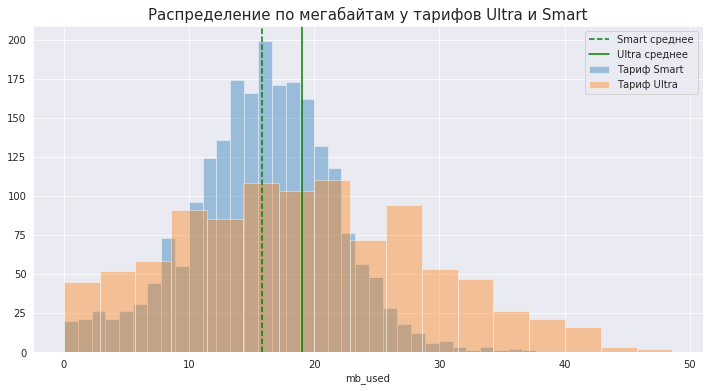

In [66]:
#Построим гистограммы для mb_used тарифов ultra и smart
histogram_drawing('mb_used', 'Распределение по мегабайтам у тарифов Ultra и Smart')

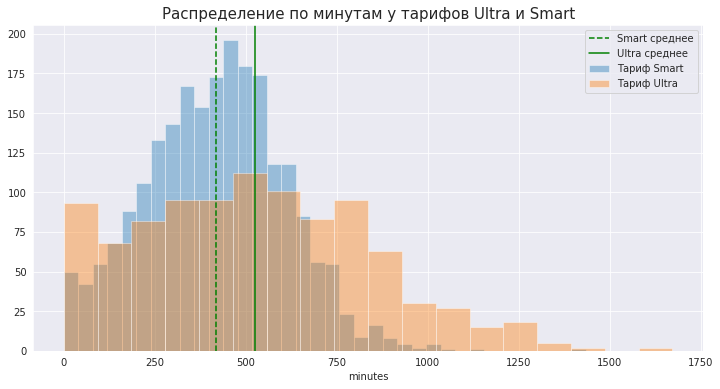

In [67]:
#Построим гистограммы для minutes тарифов ultra и smart
histogram_drawing('minutes','Распределение по минутам у тарифов Ultra и Smart')

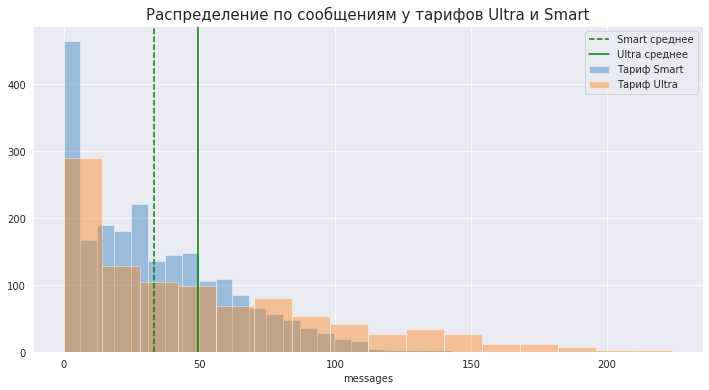

In [68]:
#Построим гистограммы для messages тарифов ultra и smart
histogram_drawing('messages','Распределение по сообщениям у тарифов Ultra и Smart')

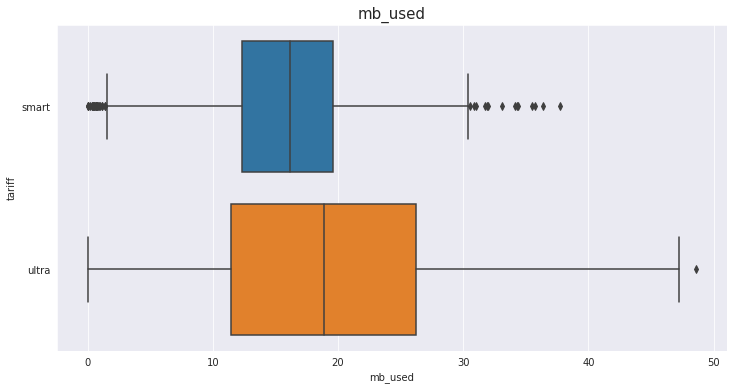

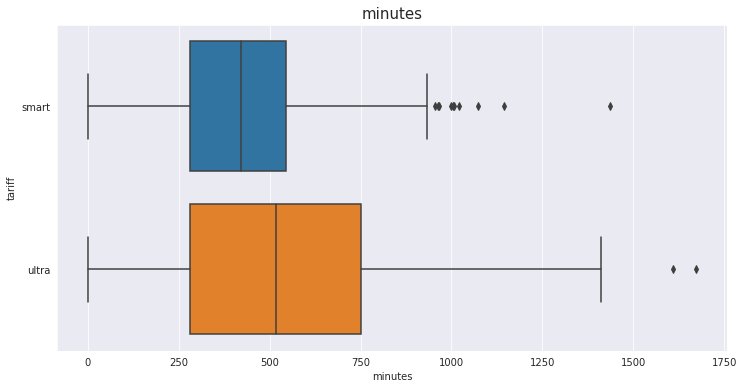

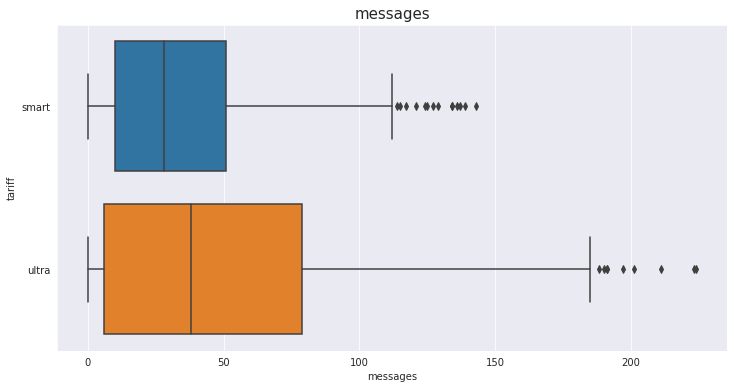

In [69]:
#Построим boxplot'ы с помощью цикла 
for columns in monthly_profit[['mb_used','minutes','messages']]:
    plt.figure(figsize=(12,6))
    plt.title(columns, fontsize=15)
    sns.boxplot(data=monthly_profit, x=columns, y='tariff')

<div class="alert alert-info"> <b>Комментарий студента:</b> Вывод

Исходя из полученных графиков видно, что пользователи тарифа Smart в среднем:

-проговаривают 400 минут, когда пользователи тарифа Ultra проговаривают 500 минут

-скачивают ~ 16000 мегабайт, когда пользователи тарифа Ultra скачивают ~ 20 000 мегабайт

-отправляют 33 сообщений, когда пользователи тарифа Ultra отправляют ~ 49 сообщений
</div>

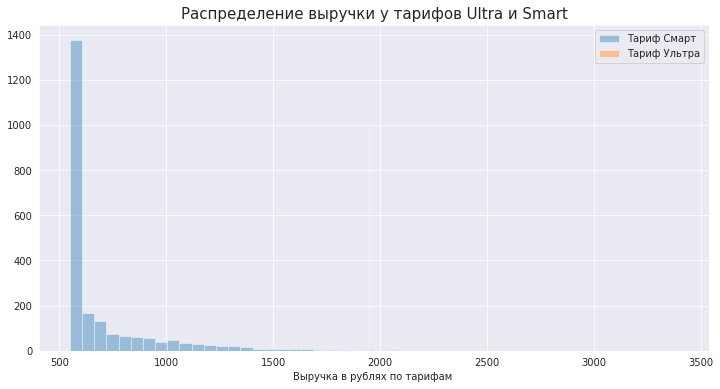

In [70]:
plt.figure(figsize=(12,6))
plt.title('Распределение выручки у тарифов Ultra и Smart', fontsize=15)
ax = sns.distplot(a=smart_tariff['profit'], label='Тариф Смарт', kde=False)
ax = sns.distplot(a=ultra_tariff['profit'], label='Тариф Ультра', kde=False)
ax.set(xlabel='Выручка в рублях по тарифам ')
plt.legend()

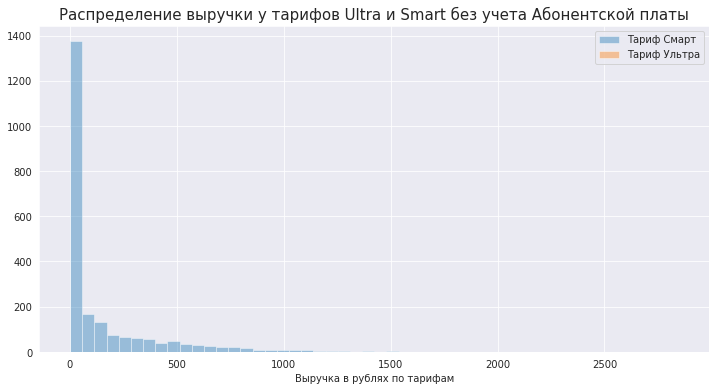

In [71]:
#Построим два графика по прибыли без учета абон платы
plt.figure(figsize=(12,6))
plt.title('Распределение выручки у тарифов Ultra и Smart без учета Абонентской платы', fontsize=15)
ax = sns.distplot(a=smart_tariff['profit']-550, label='Тариф Смарт', kde=False)
ax = sns.distplot(a=ultra_tariff['profit']-1950, label='Тариф Ультра', kde=False)
ax.set(xlabel='Выручка в рублях по тарифам')
plt.legend()

<div class="alert alert-info"> <b>Комментарий студента:</b> Исходя из графика видно, что больше всего сверх абонентской платы, оплачивают пользователи тарифа Смарт. Большинству пользователей тарифа Ультра достаточно пакета с имеющимися минутами и мегабайтами.</div>

In [72]:
smart = users[users['tariff']=='smart']
ultra = users[users['tariff']=='ultra']

print('Количество клиентов с тарифом Ультра: {}'.format(ultra['tariff'].count()))
print('Количество клиентов с тарифом Смарт: {}\n'.format(smart['tariff'].count()))
print('В среднем один пользователь тарифа Ультра приносит: {:.0f} рублей'.format(ultra_tariff['profit'].sum()/ultra['tariff'].count()))
print('В среднем один пользователь тарифа Смарт приносит: {:.0f} рублей\n'.format(smart_tariff['profit'].sum()/smart['tariff'].count()))
print('Годавая прибыль по тарифу Ультра: {:.0f} рублей'.format(ultra_tariff['profit'].sum()))
print('Годовая прибыль по тарифу Смарт: {:.0f} рублей\n'.format(smart_tariff['profit'].sum()))

Количество клиентов с тарифом Ультра: 149
Количество клиентов с тарифом Смарт: 351

В среднем один пользователь тарифа Ультра приносит: 12904 рублей
В среднем один пользователь тарифа Смарт приносит: 4397 рублей

Годавая прибыль по тарифу Ультра: 1922700 рублей
Годовая прибыль по тарифу Смарт: 1543501 рублей



<div class="alert alert-info"> <b>Вывод по Анализу Данных</b> 
    
1) Количество пользователей тарифа Смарт 351, а пользователей тарифа Ультра 149.
    
2)Как и ожидалось, пользователи тарифа Ультра, тратят больше интернет-трафика, делают больше звонков и отправляют больше сообщений больше, чем пользователи тарифа Смарт.

3)Если смотреть по средней выручке от каждого пользователя, то мы можем видеть, что каждый пользователь тарифа Ультра приносит компании в среднем 13 630 рублей в год. Когда пользователь тарифа Смарт приносит лишь 7834 рублей в год.

4)Но если посчитать годовую выручку компании, то мы видим, что выручка по тарифу Смарт приносит компании 2 749 609 рублей в год, когда выручка по тарифу Ультра приносит 2 031 509 рублей в год.
</div>

<div class="alert alert-info"> <b>Проверка Гипотезы </b> Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
    
Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средняя выручка пользователей тарифов Смарт и Ультра не различается
- Альтернативная гипотеза H₁: Средняя выручка пользователей тарифов Смарт и Ультра различается</div>

In [73]:
# Посчитаем данные по выручке от каждого пользователя 
ultra_hyp = monthly_profit[monthly_profit['tariff']=='ultra']['profit']
smart_hyp = monthly_profit[monthly_profit['tariff']=='smart']['profit']

ultra_hyp

68      1950.0
69      1950.0
70      1950.0
71      1950.0
72      1950.0
         ...  
3205    1950.0
3211    1950.0
3212    1950.0
3213    1950.0
3214    1950.0
Name: profit, Length: 986, dtype: float64

In [74]:
smart_hyp.mean()

692.1529147982063

In [75]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(ultra_hyp, smart_hyp, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


<div class="alert alert-info"> <b>Исходя из нашего теста мы видим, что средняя выручка в тарифах ультра и смарт различается. Отвергаем нулевую гипотезу</div>

<div class="alert alert-info"> <b>Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;</b> Сформулируем нулевые гипотезы :

- Нулевая гипотеза H₀: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- Альтернативная гипотеза H₁: Средняя выручка пользователей ииз Москвы отличается от выручки пользователей из других регионов</div>

In [76]:
moscow_city = monthly_profit[monthly_profit['city']=='москва'].profit
others_city = monthly_profit[monthly_profit['city']!='москва'].profit
moscow_city.mean()

1147.859247135843

In [77]:
others_city.mean()

1061.3662188099809

In [78]:
#Выполним проверку гипотезы.

alpha = .05

results = st.ttest_ind(moscow_city, others_city, equal_var = False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0025424121881247076
Отвергаем нулевую гипотезу


<div class="alert alert-info"> <b>Исходя из нашего теста мы видим, что средняя выручка пользователей с Москвы не отличается от пользователей из других регионов. Проведя тест мы не смогли отвергнуть нулевую гипотезу</div>

<div class="alert alert-info"> <b>Общий вывод: </b> 
    
1)Я изучил  таблицы, проверил их на наличие пустых значений, дубликатов и неправильных типов данных. После, в предобработке я поменял типы данных практически во всех столбцах, так как многие были указаны неверно.И подготовил все таблицы для дальнейшего анализа.

2)По заданию: посчитал: Сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитал среднее количество, дисперсию и стандартное отклонение

3)Проверил гипотезы. Убедился, что выручка тарифов Смарт и Ультра различается. Убедился, что выручка клиентов из Москвы и других регионов не отличается.

4) Изучив данные, мной было выявлено, что клиенты тарифа Ультра расходуют больше интернет-трафика, делают больше звонков и отправляют больше сообщений, нежели клиенты тарифа Смарт и практически не превышают лимит своего пакета, чего не скажешь о клиентах тарифа Смарт. Но по годовой выручке, компания получает больше выручки по тарифу Смарт, так как пользователей данного тарифа больше чем Ультра. Если считать по каждому пользователю то в среднем пользователь тарифа Ультра приносит больше выручки в год чем, пользователь Смарта.

5)И Как итог если брать считать по итоговой прибыли от тарифов Ультра и Смарт, то Смарт выгоден для компании на 700ыс. рублей в год. Но если считать ценность пользователя каждого тарифа, то пользователь тарифа Ультра приносят больше дохода, чем один пользователь тарифа Смарт
</div>